In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Pre-Processing

In [6]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
from sklearn.model_selection import train_test_split

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

df_processed = pd.get_dummies(df, columns = cat_cols, drop_first = True)
X = df_processed.drop(['output'],axis=1)
y = df_processed[['output']]

In [8]:
# Scaling the continuous numerical columns
scaler = RobustScaler()
X[con_cols] = scaler.fit_transform(X[con_cols])
X

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


# Hyperparameter Tuning with Grid Search CV

## Support Vector Machines

In [9]:
svc = SVC()
parameters = {"C":np.arange(1,10,1),'gamma':[0.01,0.05,0.1,0.5,1, 0.001, 0.005], 'kernel':['rbf','linear']}
gs_svm = GridSearchCV(svc, parameters, cv=10)
gs_svm.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 0.001, 0.005],
                         'kernel': ['rbf', 'linear']})

In [10]:
svm_results = pd.DataFrame(gs_svm.cv_results_)
gs_svm.best_params_, gs_svm.best_score_

({'C': 7, 'gamma': 0.05, 'kernel': 'rbf'}, 0.8512903225806451)

## Random Forest

In [11]:
rf = RandomForestClassifier()
parameters = {"n_estimators":[75,100,150], "min_samples_leaf":[None,3,5,10], "criterion":["gini","entropy"]}
gs_rf = GridSearchCV(rf, parameters, cv=10)
gs_rf.fit(X, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [None, 3, 5, 10],
                         'n_estimators': [75, 100, 150]})

In [12]:
rf_results = pd.DataFrame(gs_rf.cv_results_)
gs_rf.best_params_, gs_rf.best_score_

({'criterion': 'entropy', 'min_samples_leaf': 3, 'n_estimators': 100},
 0.8019354838709678)

## K Nearest Neighbors

In [13]:
knn = KNeighborsClassifier()
parameters = {"n_neighbors":np.arange(1,50,2)}
gs_knn = GridSearchCV(knn, parameters, cv=10)
gs_knn.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])})

In [14]:
knn_results = pd.DataFrame(gs_knn.cv_results_)
gs_knn.best_params_, gs_knn.best_score_

({'n_neighbors': 5}, 0.8183870967741935)

# Utility Functions

In [15]:
def get_model_score(model, X_train,X_test, y_train, y_test, fold):
  model.fit(X_train, y_train)
  y_preds = model.predict(X_test)

  s = "*" * 100
  print(s)
  print("RESULTS FOR FOLD "+ str(fold))

  print("\n\nConfusion Matrix")
  cm = confusion_matrix(y_test, y_preds)
  plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
  plt.show()

  TN, FP, FN, TP = cm.ravel()

  TPR = TP/(TP+FN)
  TNR = TN/(TN+FP) 
  PPV = TP/(TP+FP)
  NPV = TN/(TN+FN)
  FPR = FP/(FP+TN)
  FNR = FN/(TP+FN)
  FDR = FP/(TP+FP)

  ACC = model.score(X_test, y_test)

  print("True Positive: ", TP)
  print("True Negative: ", TN)
  print("Flase Positive: ", FP)
  print("Flase Negative: ", FN)
  print("True Postivie Rate", TPR)
  print("True Negativie Rate: ", TNR)
  print("Positive Prediction Value: ", PPV)
  print("Negative Prediction Value: ", NPV)
  print("False Positive Rate: ", FPR)
  print("False Negative Rate: ", FNR)
  print("False Discovery Rate: ",FDR)
  print(f"Accuracy: {ACC*100:.2f}%")
  print("\n\n")

  return ACC

# Initializing all models with best parameters (found by GridSearchCV)

In [22]:
#Initializing all models

svc = SVC(C=7, gamma=0.05, kernel='rbf')
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
rf = RandomForestClassifier(n_jobs=-1, n_estimators=150, min_samples_leaf=3, criterion="entropy")
nb = GaussianNB()

# Initilialization of 10-fold Cross Validation (Stratified) and Scores dictionary to store results
kf = StratifiedKFold(n_splits=10, random_state=15)
scores = defaultdict(list)

# 1. Random Forest with 10-Fold Cross Validation

****************************************************************************************************
RESULTS FOR FOLD 1


Confusion Matrix


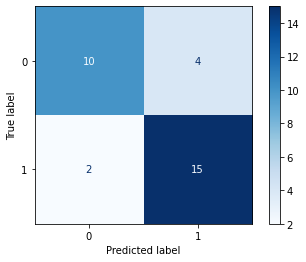

True Positive:  15
True Negative:  10
Flase Positive:  4
Flase Negative:  2
True Postivie Rate 0.8823529411764706
True Negativie Rate:  0.7142857142857143
Positive Prediction Value:  0.7894736842105263
Negative Prediction Value:  0.8333333333333334
False Positive Rate:  0.2857142857142857
False Negative Rate:  0.11764705882352941
False Discovery Rate:  0.21052631578947367
Accuracy: 80.65%



****************************************************************************************************
RESULTS FOR FOLD 2


Confusion Matrix


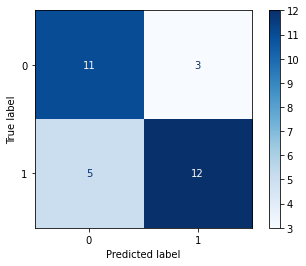

True Positive:  12
True Negative:  11
Flase Positive:  3
Flase Negative:  5
True Postivie Rate 0.7058823529411765
True Negativie Rate:  0.7857142857142857
Positive Prediction Value:  0.8
Negative Prediction Value:  0.6875
False Positive Rate:  0.21428571428571427
False Negative Rate:  0.29411764705882354
False Discovery Rate:  0.2
Accuracy: 74.19%



****************************************************************************************************
RESULTS FOR FOLD 3


Confusion Matrix


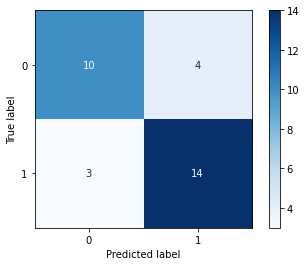

True Positive:  14
True Negative:  10
Flase Positive:  4
Flase Negative:  3
True Postivie Rate 0.8235294117647058
True Negativie Rate:  0.7142857142857143
Positive Prediction Value:  0.7777777777777778
Negative Prediction Value:  0.7692307692307693
False Positive Rate:  0.2857142857142857
False Negative Rate:  0.17647058823529413
False Discovery Rate:  0.2222222222222222
Accuracy: 77.42%



****************************************************************************************************
RESULTS FOR FOLD 4


Confusion Matrix


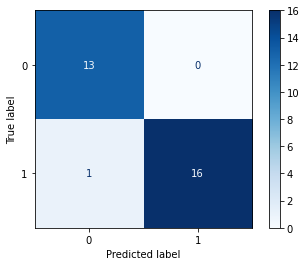

True Positive:  16
True Negative:  13
Flase Positive:  0
Flase Negative:  1
True Postivie Rate 0.9411764705882353
True Negativie Rate:  1.0
Positive Prediction Value:  1.0
Negative Prediction Value:  0.9285714285714286
False Positive Rate:  0.0
False Negative Rate:  0.058823529411764705
False Discovery Rate:  0.0
Accuracy: 96.67%



****************************************************************************************************
RESULTS FOR FOLD 5


Confusion Matrix


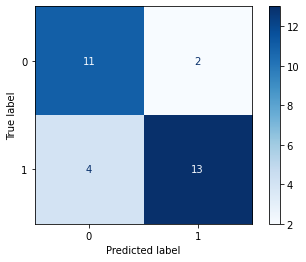

True Positive:  13
True Negative:  11
Flase Positive:  2
Flase Negative:  4
True Postivie Rate 0.7647058823529411
True Negativie Rate:  0.8461538461538461
Positive Prediction Value:  0.8666666666666667
Negative Prediction Value:  0.7333333333333333
False Positive Rate:  0.15384615384615385
False Negative Rate:  0.23529411764705882
False Discovery Rate:  0.13333333333333333
Accuracy: 80.00%



****************************************************************************************************
RESULTS FOR FOLD 6


Confusion Matrix


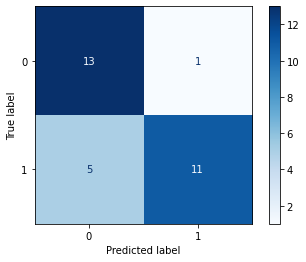

True Positive:  11
True Negative:  13
Flase Positive:  1
Flase Negative:  5
True Postivie Rate 0.6875
True Negativie Rate:  0.9285714285714286
Positive Prediction Value:  0.9166666666666666
Negative Prediction Value:  0.7222222222222222
False Positive Rate:  0.07142857142857142
False Negative Rate:  0.3125
False Discovery Rate:  0.08333333333333333
Accuracy: 80.00%



****************************************************************************************************
RESULTS FOR FOLD 7


Confusion Matrix


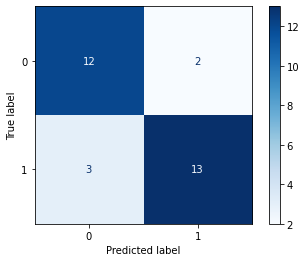

True Positive:  13
True Negative:  12
Flase Positive:  2
Flase Negative:  3
True Postivie Rate 0.8125
True Negativie Rate:  0.8571428571428571
Positive Prediction Value:  0.8666666666666667
Negative Prediction Value:  0.8
False Positive Rate:  0.14285714285714285
False Negative Rate:  0.1875
False Discovery Rate:  0.13333333333333333
Accuracy: 83.33%



****************************************************************************************************
RESULTS FOR FOLD 8


Confusion Matrix


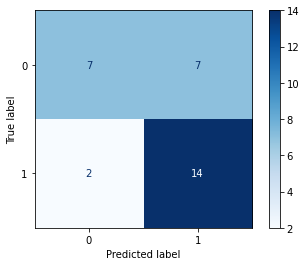

True Positive:  14
True Negative:  7
Flase Positive:  7
Flase Negative:  2
True Postivie Rate 0.875
True Negativie Rate:  0.5
Positive Prediction Value:  0.6666666666666666
Negative Prediction Value:  0.7777777777777778
False Positive Rate:  0.5
False Negative Rate:  0.125
False Discovery Rate:  0.3333333333333333
Accuracy: 70.00%



****************************************************************************************************
RESULTS FOR FOLD 9


Confusion Matrix


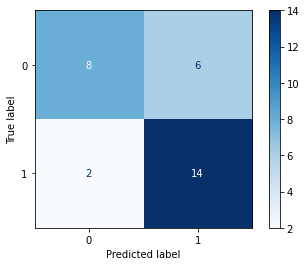

True Positive:  14
True Negative:  8
Flase Positive:  6
Flase Negative:  2
True Postivie Rate 0.875
True Negativie Rate:  0.5714285714285714
Positive Prediction Value:  0.7
Negative Prediction Value:  0.8
False Positive Rate:  0.42857142857142855
False Negative Rate:  0.125
False Discovery Rate:  0.3
Accuracy: 73.33%



****************************************************************************************************
RESULTS FOR FOLD 10


Confusion Matrix


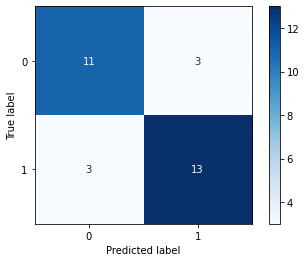

True Positive:  13
True Negative:  11
Flase Positive:  3
Flase Negative:  3
True Postivie Rate 0.8125
True Negativie Rate:  0.7857142857142857
Positive Prediction Value:  0.8125
Negative Prediction Value:  0.7857142857142857
False Positive Rate:  0.21428571428571427
False Negative Rate:  0.1875
False Discovery Rate:  0.1875
Accuracy: 80.00%





In [17]:
fold = 1
for train_index, test_index in kf.split(X,y):
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
  scores['Random Forest'].append(get_model_score(rf, X_train, X_test, y_train, y_test, fold))
  fold+=1

#Appending the average score across the 10-Folds
scores['Random Forest'].append(np.mean(scores['Random Forest']))

# 2. Support Vector Machine with 10-Fold Cross Validation

****************************************************************************************************
RESULTS FOR FOLD 1


Confusion Matrix


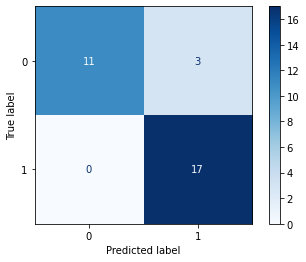

True Positive:  17
True Negative:  11
Flase Positive:  3
Flase Negative:  0
True Postivie Rate 1.0
True Negativie Rate:  0.7857142857142857
Positive Prediction Value:  0.85
Negative Prediction Value:  1.0
False Positive Rate:  0.21428571428571427
False Negative Rate:  0.0
False Discovery Rate:  0.15
Accuracy: 90.32%



****************************************************************************************************
RESULTS FOR FOLD 2


Confusion Matrix


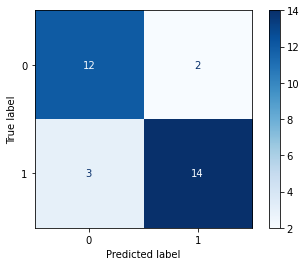

True Positive:  14
True Negative:  12
Flase Positive:  2
Flase Negative:  3
True Postivie Rate 0.8235294117647058
True Negativie Rate:  0.8571428571428571
Positive Prediction Value:  0.875
Negative Prediction Value:  0.8
False Positive Rate:  0.14285714285714285
False Negative Rate:  0.17647058823529413
False Discovery Rate:  0.125
Accuracy: 83.87%



****************************************************************************************************
RESULTS FOR FOLD 3


Confusion Matrix


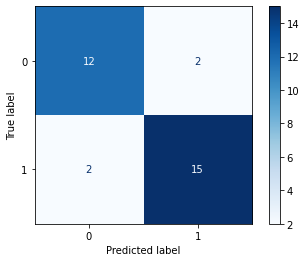

True Positive:  15
True Negative:  12
Flase Positive:  2
Flase Negative:  2
True Postivie Rate 0.8823529411764706
True Negativie Rate:  0.8571428571428571
Positive Prediction Value:  0.8823529411764706
Negative Prediction Value:  0.8571428571428571
False Positive Rate:  0.14285714285714285
False Negative Rate:  0.11764705882352941
False Discovery Rate:  0.11764705882352941
Accuracy: 87.10%



****************************************************************************************************
RESULTS FOR FOLD 4


Confusion Matrix


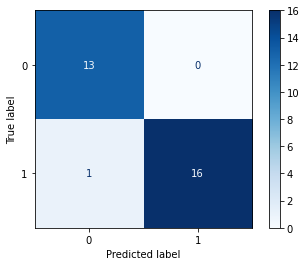

True Positive:  16
True Negative:  13
Flase Positive:  0
Flase Negative:  1
True Postivie Rate 0.9411764705882353
True Negativie Rate:  1.0
Positive Prediction Value:  1.0
Negative Prediction Value:  0.9285714285714286
False Positive Rate:  0.0
False Negative Rate:  0.058823529411764705
False Discovery Rate:  0.0
Accuracy: 96.67%



****************************************************************************************************
RESULTS FOR FOLD 5


Confusion Matrix


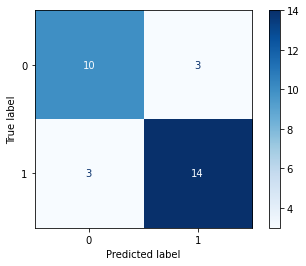

True Positive:  14
True Negative:  10
Flase Positive:  3
Flase Negative:  3
True Postivie Rate 0.8235294117647058
True Negativie Rate:  0.7692307692307693
Positive Prediction Value:  0.8235294117647058
Negative Prediction Value:  0.7692307692307693
False Positive Rate:  0.23076923076923078
False Negative Rate:  0.17647058823529413
False Discovery Rate:  0.17647058823529413
Accuracy: 80.00%



****************************************************************************************************
RESULTS FOR FOLD 6


Confusion Matrix


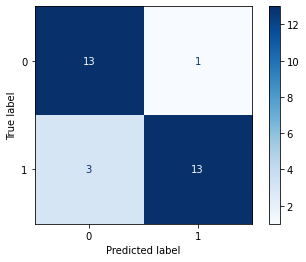

True Positive:  13
True Negative:  13
Flase Positive:  1
Flase Negative:  3
True Postivie Rate 0.8125
True Negativie Rate:  0.9285714285714286
Positive Prediction Value:  0.9285714285714286
Negative Prediction Value:  0.8125
False Positive Rate:  0.07142857142857142
False Negative Rate:  0.1875
False Discovery Rate:  0.07142857142857142
Accuracy: 86.67%



****************************************************************************************************
RESULTS FOR FOLD 7


Confusion Matrix


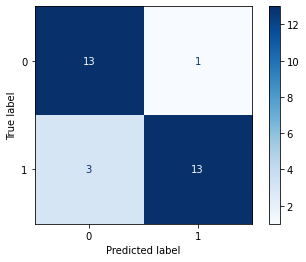

True Positive:  13
True Negative:  13
Flase Positive:  1
Flase Negative:  3
True Postivie Rate 0.8125
True Negativie Rate:  0.9285714285714286
Positive Prediction Value:  0.9285714285714286
Negative Prediction Value:  0.8125
False Positive Rate:  0.07142857142857142
False Negative Rate:  0.1875
False Discovery Rate:  0.07142857142857142
Accuracy: 86.67%



****************************************************************************************************
RESULTS FOR FOLD 8


Confusion Matrix


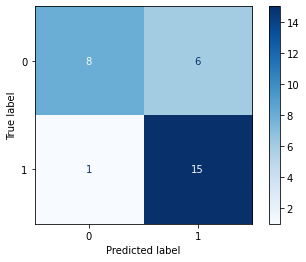

True Positive:  15
True Negative:  8
Flase Positive:  6
Flase Negative:  1
True Postivie Rate 0.9375
True Negativie Rate:  0.5714285714285714
Positive Prediction Value:  0.7142857142857143
Negative Prediction Value:  0.8888888888888888
False Positive Rate:  0.42857142857142855
False Negative Rate:  0.0625
False Discovery Rate:  0.2857142857142857
Accuracy: 76.67%



****************************************************************************************************
RESULTS FOR FOLD 9


Confusion Matrix


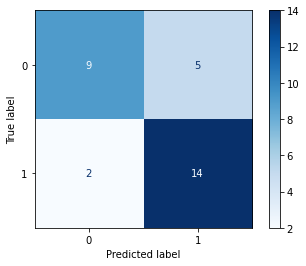

True Positive:  14
True Negative:  9
Flase Positive:  5
Flase Negative:  2
True Postivie Rate 0.875
True Negativie Rate:  0.6428571428571429
Positive Prediction Value:  0.7368421052631579
Negative Prediction Value:  0.8181818181818182
False Positive Rate:  0.35714285714285715
False Negative Rate:  0.125
False Discovery Rate:  0.2631578947368421
Accuracy: 76.67%



****************************************************************************************************
RESULTS FOR FOLD 10


Confusion Matrix


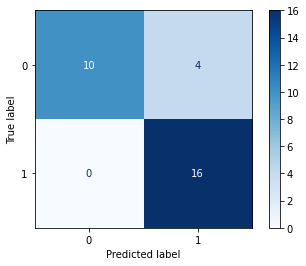

True Positive:  16
True Negative:  10
Flase Positive:  4
Flase Negative:  0
True Postivie Rate 1.0
True Negativie Rate:  0.7142857142857143
Positive Prediction Value:  0.8
Negative Prediction Value:  1.0
False Positive Rate:  0.2857142857142857
False Negative Rate:  0.0
False Discovery Rate:  0.2
Accuracy: 86.67%





In [18]:
fold = 1
for train_index, test_index in kf.split(X,y):
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
  scores['SVM'].append(get_model_score(svc, X_train, X_test, y_train, y_test, fold))
  fold+=1

scores['SVM'].append(np.mean(scores['SVM']))

# 3. K Nearest Neighbours with 10-Fold Cross Validation

****************************************************************************************************
RESULTS FOR FOLD 1


Confusion Matrix


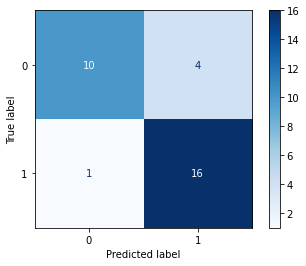

True Positive:  16
True Negative:  10
Flase Positive:  4
Flase Negative:  1
True Postivie Rate 0.9411764705882353
True Negativie Rate:  0.7142857142857143
Positive Prediction Value:  0.8
Negative Prediction Value:  0.9090909090909091
False Positive Rate:  0.2857142857142857
False Negative Rate:  0.058823529411764705
False Discovery Rate:  0.2
Accuracy: 83.87%



****************************************************************************************************
RESULTS FOR FOLD 2


Confusion Matrix


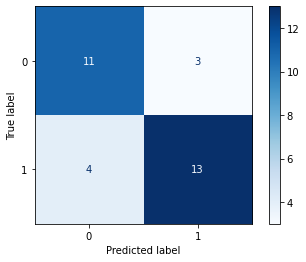

True Positive:  13
True Negative:  11
Flase Positive:  3
Flase Negative:  4
True Postivie Rate 0.7647058823529411
True Negativie Rate:  0.7857142857142857
Positive Prediction Value:  0.8125
Negative Prediction Value:  0.7333333333333333
False Positive Rate:  0.21428571428571427
False Negative Rate:  0.23529411764705882
False Discovery Rate:  0.1875
Accuracy: 77.42%



****************************************************************************************************
RESULTS FOR FOLD 3


Confusion Matrix


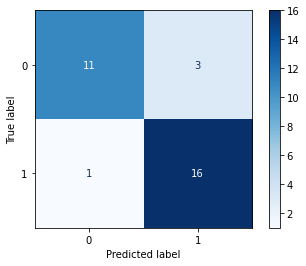

True Positive:  16
True Negative:  11
Flase Positive:  3
Flase Negative:  1
True Postivie Rate 0.9411764705882353
True Negativie Rate:  0.7857142857142857
Positive Prediction Value:  0.8421052631578947
Negative Prediction Value:  0.9166666666666666
False Positive Rate:  0.21428571428571427
False Negative Rate:  0.058823529411764705
False Discovery Rate:  0.15789473684210525
Accuracy: 87.10%



****************************************************************************************************
RESULTS FOR FOLD 4


Confusion Matrix


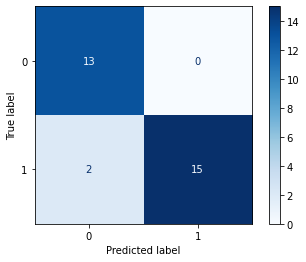

True Positive:  15
True Negative:  13
Flase Positive:  0
Flase Negative:  2
True Postivie Rate 0.8823529411764706
True Negativie Rate:  1.0
Positive Prediction Value:  1.0
Negative Prediction Value:  0.8666666666666667
False Positive Rate:  0.0
False Negative Rate:  0.11764705882352941
False Discovery Rate:  0.0
Accuracy: 93.33%



****************************************************************************************************
RESULTS FOR FOLD 5


Confusion Matrix


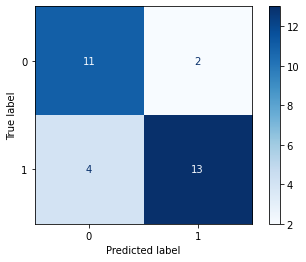

True Positive:  13
True Negative:  11
Flase Positive:  2
Flase Negative:  4
True Postivie Rate 0.7647058823529411
True Negativie Rate:  0.8461538461538461
Positive Prediction Value:  0.8666666666666667
Negative Prediction Value:  0.7333333333333333
False Positive Rate:  0.15384615384615385
False Negative Rate:  0.23529411764705882
False Discovery Rate:  0.13333333333333333
Accuracy: 80.00%



****************************************************************************************************
RESULTS FOR FOLD 6


Confusion Matrix


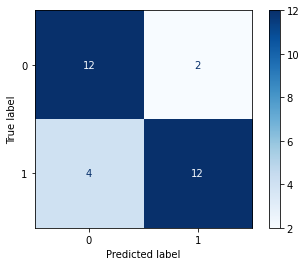

True Positive:  12
True Negative:  12
Flase Positive:  2
Flase Negative:  4
True Postivie Rate 0.75
True Negativie Rate:  0.8571428571428571
Positive Prediction Value:  0.8571428571428571
Negative Prediction Value:  0.75
False Positive Rate:  0.14285714285714285
False Negative Rate:  0.25
False Discovery Rate:  0.14285714285714285
Accuracy: 80.00%



****************************************************************************************************
RESULTS FOR FOLD 7


Confusion Matrix


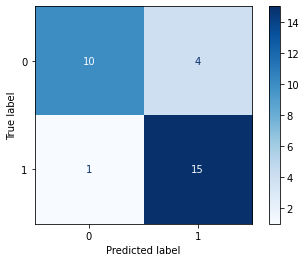

True Positive:  15
True Negative:  10
Flase Positive:  4
Flase Negative:  1
True Postivie Rate 0.9375
True Negativie Rate:  0.7142857142857143
Positive Prediction Value:  0.7894736842105263
Negative Prediction Value:  0.9090909090909091
False Positive Rate:  0.2857142857142857
False Negative Rate:  0.0625
False Discovery Rate:  0.21052631578947367
Accuracy: 83.33%



****************************************************************************************************
RESULTS FOR FOLD 8


Confusion Matrix


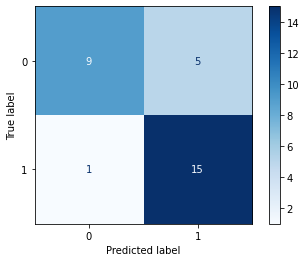

True Positive:  15
True Negative:  9
Flase Positive:  5
Flase Negative:  1
True Postivie Rate 0.9375
True Negativie Rate:  0.6428571428571429
Positive Prediction Value:  0.75
Negative Prediction Value:  0.9
False Positive Rate:  0.35714285714285715
False Negative Rate:  0.0625
False Discovery Rate:  0.25
Accuracy: 80.00%



****************************************************************************************************
RESULTS FOR FOLD 9


Confusion Matrix


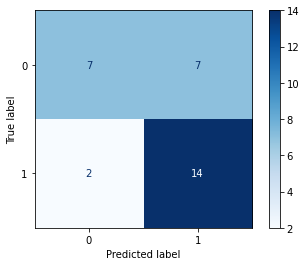

True Positive:  14
True Negative:  7
Flase Positive:  7
Flase Negative:  2
True Postivie Rate 0.875
True Negativie Rate:  0.5
Positive Prediction Value:  0.6666666666666666
Negative Prediction Value:  0.7777777777777778
False Positive Rate:  0.5
False Negative Rate:  0.125
False Discovery Rate:  0.3333333333333333
Accuracy: 70.00%



****************************************************************************************************
RESULTS FOR FOLD 10


Confusion Matrix


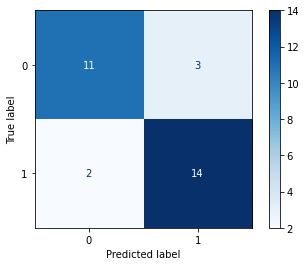

True Positive:  14
True Negative:  11
Flase Positive:  3
Flase Negative:  2
True Postivie Rate 0.875
True Negativie Rate:  0.7857142857142857
Positive Prediction Value:  0.8235294117647058
Negative Prediction Value:  0.8461538461538461
False Positive Rate:  0.21428571428571427
False Negative Rate:  0.125
False Discovery Rate:  0.17647058823529413
Accuracy: 83.33%





In [19]:
fold = 1
for train_index, test_index in kf.split(X,y):
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
  scores['KNN'].append(get_model_score(knn, X_train, X_test, y_train, y_test, fold))
  fold+=1

scores['KNN'].append(np.mean(scores['KNN']))

# 4. Naive Bayes with 10-Fold Cross Validation

****************************************************************************************************
RESULTS FOR FOLD 1


Confusion Matrix


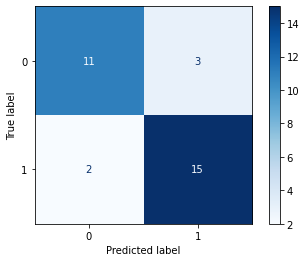

True Positive:  15
True Negative:  11
Flase Positive:  3
Flase Negative:  2
True Postivie Rate 0.8823529411764706
True Negativie Rate:  0.7857142857142857
Positive Prediction Value:  0.8333333333333334
Negative Prediction Value:  0.8461538461538461
False Positive Rate:  0.21428571428571427
False Negative Rate:  0.11764705882352941
False Discovery Rate:  0.16666666666666666
Accuracy: 83.87%



****************************************************************************************************
RESULTS FOR FOLD 2


Confusion Matrix


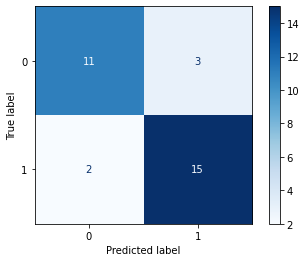

True Positive:  15
True Negative:  11
Flase Positive:  3
Flase Negative:  2
True Postivie Rate 0.8823529411764706
True Negativie Rate:  0.7857142857142857
Positive Prediction Value:  0.8333333333333334
Negative Prediction Value:  0.8461538461538461
False Positive Rate:  0.21428571428571427
False Negative Rate:  0.11764705882352941
False Discovery Rate:  0.16666666666666666
Accuracy: 83.87%



****************************************************************************************************
RESULTS FOR FOLD 3


Confusion Matrix


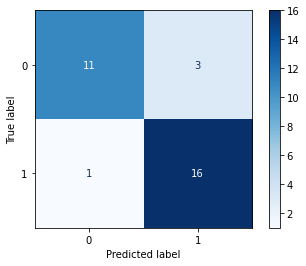

True Positive:  16
True Negative:  11
Flase Positive:  3
Flase Negative:  1
True Postivie Rate 0.9411764705882353
True Negativie Rate:  0.7857142857142857
Positive Prediction Value:  0.8421052631578947
Negative Prediction Value:  0.9166666666666666
False Positive Rate:  0.21428571428571427
False Negative Rate:  0.058823529411764705
False Discovery Rate:  0.15789473684210525
Accuracy: 87.10%



****************************************************************************************************
RESULTS FOR FOLD 4


Confusion Matrix


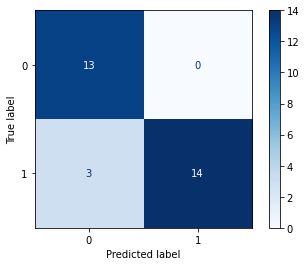

True Positive:  14
True Negative:  13
Flase Positive:  0
Flase Negative:  3
True Postivie Rate 0.8235294117647058
True Negativie Rate:  1.0
Positive Prediction Value:  1.0
Negative Prediction Value:  0.8125
False Positive Rate:  0.0
False Negative Rate:  0.17647058823529413
False Discovery Rate:  0.0
Accuracy: 90.00%



****************************************************************************************************
RESULTS FOR FOLD 5


Confusion Matrix


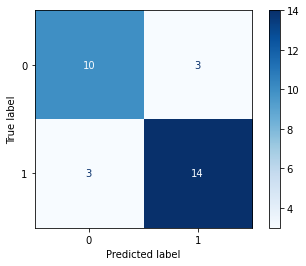

True Positive:  14
True Negative:  10
Flase Positive:  3
Flase Negative:  3
True Postivie Rate 0.8235294117647058
True Negativie Rate:  0.7692307692307693
Positive Prediction Value:  0.8235294117647058
Negative Prediction Value:  0.7692307692307693
False Positive Rate:  0.23076923076923078
False Negative Rate:  0.17647058823529413
False Discovery Rate:  0.17647058823529413
Accuracy: 80.00%



****************************************************************************************************
RESULTS FOR FOLD 6


Confusion Matrix


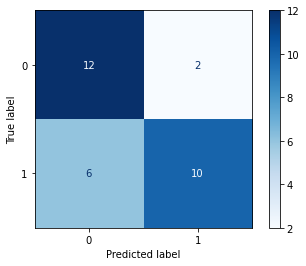

True Positive:  10
True Negative:  12
Flase Positive:  2
Flase Negative:  6
True Postivie Rate 0.625
True Negativie Rate:  0.8571428571428571
Positive Prediction Value:  0.8333333333333334
Negative Prediction Value:  0.6666666666666666
False Positive Rate:  0.14285714285714285
False Negative Rate:  0.375
False Discovery Rate:  0.16666666666666666
Accuracy: 73.33%



****************************************************************************************************
RESULTS FOR FOLD 7


Confusion Matrix


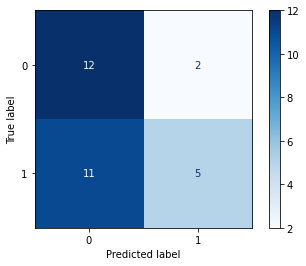

True Positive:  5
True Negative:  12
Flase Positive:  2
Flase Negative:  11
True Postivie Rate 0.3125
True Negativie Rate:  0.8571428571428571
Positive Prediction Value:  0.7142857142857143
Negative Prediction Value:  0.5217391304347826
False Positive Rate:  0.14285714285714285
False Negative Rate:  0.6875
False Discovery Rate:  0.2857142857142857
Accuracy: 56.67%



****************************************************************************************************
RESULTS FOR FOLD 8


Confusion Matrix


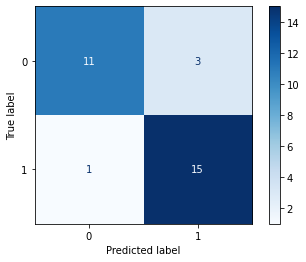

True Positive:  15
True Negative:  11
Flase Positive:  3
Flase Negative:  1
True Postivie Rate 0.9375
True Negativie Rate:  0.7857142857142857
Positive Prediction Value:  0.8333333333333334
Negative Prediction Value:  0.9166666666666666
False Positive Rate:  0.21428571428571427
False Negative Rate:  0.0625
False Discovery Rate:  0.16666666666666666
Accuracy: 86.67%



****************************************************************************************************
RESULTS FOR FOLD 9


Confusion Matrix


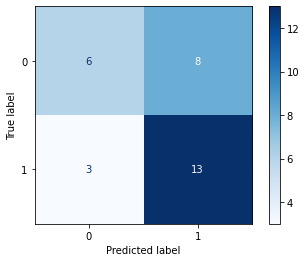

True Positive:  13
True Negative:  6
Flase Positive:  8
Flase Negative:  3
True Postivie Rate 0.8125
True Negativie Rate:  0.42857142857142855
Positive Prediction Value:  0.6190476190476191
Negative Prediction Value:  0.6666666666666666
False Positive Rate:  0.5714285714285714
False Negative Rate:  0.1875
False Discovery Rate:  0.38095238095238093
Accuracy: 63.33%



****************************************************************************************************
RESULTS FOR FOLD 10


Confusion Matrix


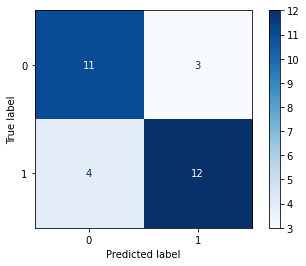

True Positive:  12
True Negative:  11
Flase Positive:  3
Flase Negative:  4
True Postivie Rate 0.75
True Negativie Rate:  0.7857142857142857
Positive Prediction Value:  0.8
Negative Prediction Value:  0.7333333333333333
False Positive Rate:  0.21428571428571427
False Negative Rate:  0.25
False Discovery Rate:  0.2
Accuracy: 76.67%





In [20]:
fold = 1
for train_index, test_index in kf.split(X,y):
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
  scores['Naive Bayes'].append(get_model_score(nb, X_train, X_test, y_train, y_test, fold))
  fold+=1

scores['Naive Bayes'].append(np.mean(scores['Naive Bayes']))

# FINAL RESULTS

In [21]:
cols = ["FOLD_"+str(i) for i in range(1,11)]
cols.append("AVERAGE_10_Folds")
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=cols)
scores_df

,FOLD_1,FOLD_2,FOLD_3,FOLD_4,FOLD_5,FOLD_6,FOLD_7,FOLD_8,FOLD_9,FOLD_10,AVERAGE_10_Folds
Random Forest,0.806452,0.741935,0.774194,0.966667,0.8,0.800000,0.833333,0.700000,0.733333,0.800000,0.795591
SVM,0.903226,0.838710,0.870968,0.966667,0.8,0.866667,0.866667,0.766667,0.766667,0.866667,0.851290
KNN,0.838710,0.774194,0.870968,0.933333,0.8,0.800000,0.833333,0.800000,0.700000,0.833333,0.818387
Naive Bayes,0.838710,0.838710,0.870968,0.900000,0.8,0.733333,0.566667,0.866667,0.633333,0.766667,0.781505
